<a href="https://colab.research.google.com/github/HarikrishnanK9/Pneumonia_Detection/blob/main/Pneumonia_Detection_Imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/MyDrive/PNEUM/archive.zip' '/content'

In [3]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [6]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)




In [7]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 5216 images belonging to 2 classes.


In [8]:
val_generator = val_datagen.flow_from_directory('/content/chest_xray/val',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary')


Found 16 images belonging to 2 classes.


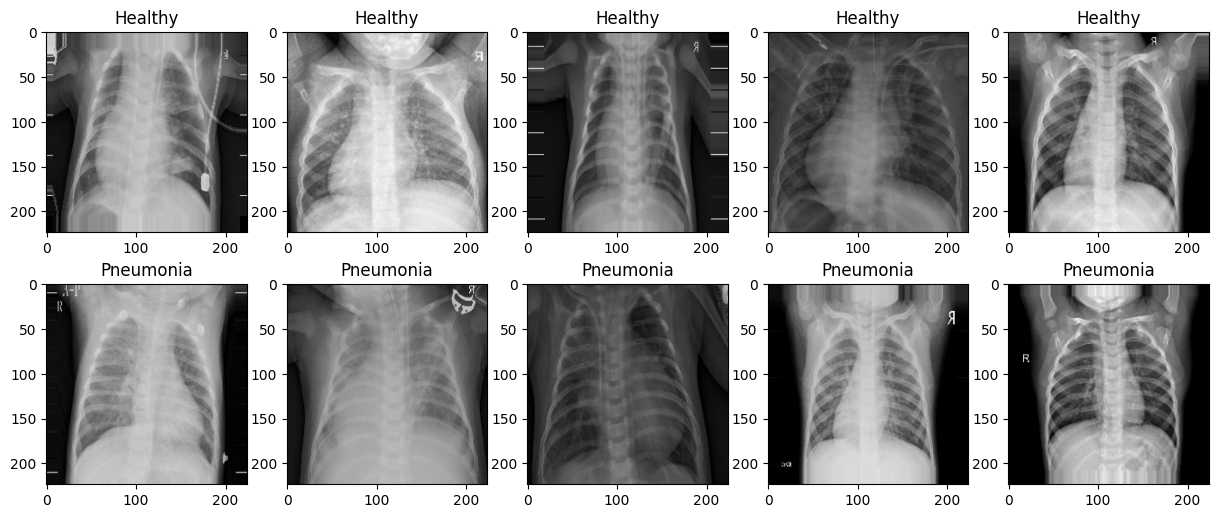

In [93]:
num_images_to_display = 5
healthy_images, _ = train_generator.next()
pneumonia_images, _ = train_generator.next()
plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_images[i])
    plt.title("Healthy")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_images[i])
    plt.title("Pneumonia")

In [9]:
# Train the model
history=model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 [==============================] - 131s 720ms/step - loss: 0.2425 - accuracy: 0.9189 - val_loss: 0.2709 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 117s 720ms/step - loss: 0.1200 - accuracy: 0.9551 - val_loss: 0.1742 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 118s 723ms/step - loss: 0.0967 - accuracy: 0.9636 - val_loss: 0.1526 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 118s 725ms/step - loss: 0.0829 - accuracy: 0.9682 - val_loss: 0.2728 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 117s 719ms/step - loss: 0.0825 - accuracy: 0.9684 - val_loss: 0.3647 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 114s 702ms/step - loss: 0.0867 - accuracy: 0.9684 - val_loss: 0.2335 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 117s 712ms/step - loss: 0.0757 - accuracy: 0.9711 - val_loss: 0.1667 -

In [63]:
def predict_image(image_path, model, image_size=(224, 224)):
    img = image.load_img(image_path, target_size=image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    prediction = model.predict(img)
    return "Normal" if prediction < 0.5 else "Pneumonia"

In [68]:
img = '/content/chest_xray/train/NORMAL/IM-0129-0001.jpeg'

In [69]:
prediction = predict_image(img, model)
print(prediction)

1/1 [==============================] - 0s 19ms/step
Normal


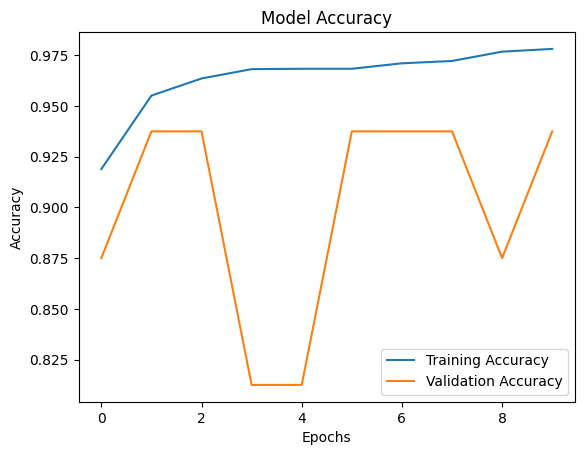

In [89]:

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


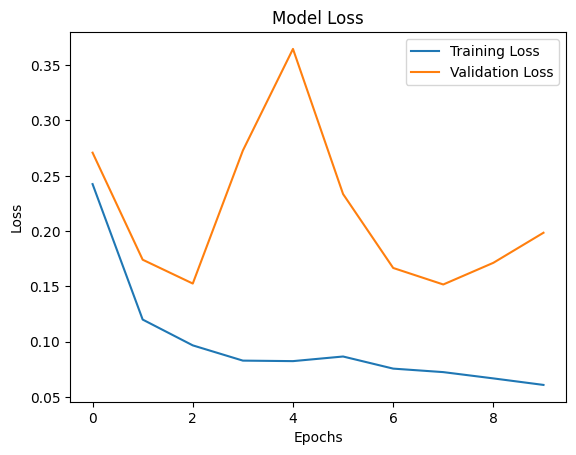

In [90]:

plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [82]:
model.save('pneumonia.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
!cp '/content/pneumonia.h5' '/content/drive/MyDrive/PNEUM'

In [34]:
from tensorflow.keras import layers, models

In [39]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model1 = models.Sequential()
model1.add(base_model)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))


In [40]:
model1.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
# Train the model
history1=model1.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 [==============================] - 119s 714ms/step - loss: 0.2921 - accuracy: 0.9064 - val_loss: 0.5283 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 118s 724ms/step - loss: 0.1588 - accuracy: 0.9390 - val_loss: 0.2779 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 118s 723ms/step - loss: 0.1482 - accuracy: 0.9419 - val_loss: 0.6245 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 116s 713ms/step - loss: 0.1343 - accuracy: 0.9500 - val_loss: 0.2831 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 114s 700ms/step - loss: 0.1249 - accuracy: 0.9544 - val_loss: 0.2052 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 118s 719ms/step - loss: 0.1202 - accuracy: 0.9569 - val_loss: 0.3684 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 115s 708ms/step - loss: 0.1205 - accuracy: 0.9536 - val_loss: 0.2516 -

In [70]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path, model1, image_size=(224, 224)):
    img = image.load_img(image_path, target_size=image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    prediction = model.predict(img)
    return "Normal" if prediction < 0.5 else "Pneumonia"

In [80]:
img1= '/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg'

In [81]:
prediction = predict_image(img1, model)
print(prediction)

1/1 [==============================] - 0s 20ms/step
Pneumonia


In [84]:
model1.save('pneumonia1.h5')

In [85]:
!cp '/content/pneumonia1.h5' '/content/drive/MyDrive/PNEUM'

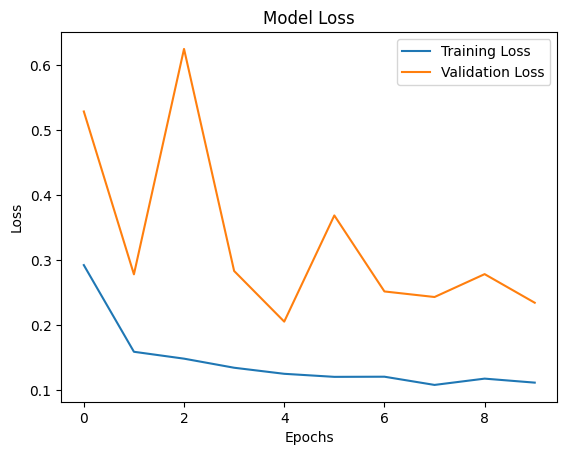

In [87]:
plt.plot(history1.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history1.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


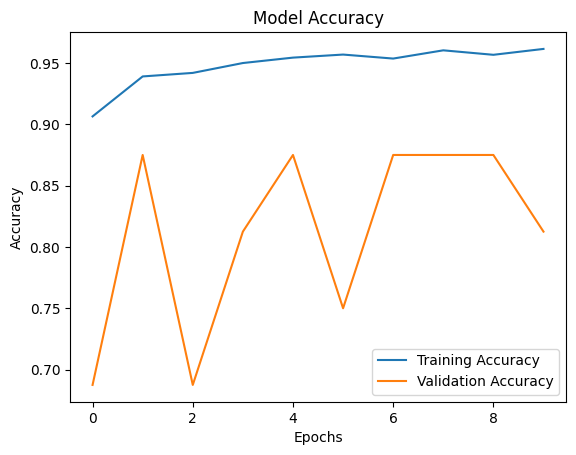

In [88]:

# Plotting training accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
